In [1]:
import numpy as np

In [2]:
la = np.linalg
words = ['I', 'like', 'enjoy', 'deep', 'learning', 'NLP', 'flying', '.']
X = np.array([[0,2,1,0,0,0,0,0],
             [2,0,0,1,0,1,0,0],
             [1,0,0,0,0,0,1,0],
             [0,1,0,0,1,0,0,0],
             [0,0,0,1,0,0,0,1],
             [0,1,0,0,0,0,0,1],
             [0,0,1,0,0,0,0,1],
             [0,0,0,0,1,1,1,0]])

In [3]:
U, s, Vh = la.svd(X, full_matrices=False)

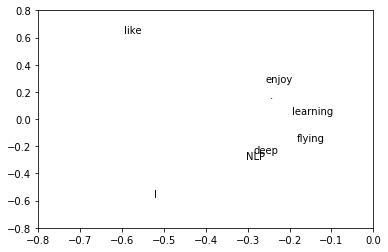

In [4]:
import matplotlib.pyplot as plt
for i in range(len(words)):
    plt.text(U[i,0], U[i,1], words[i])
plt.xlim(-0.8, 0)
plt.ylim(-0.8, 0.8)
plt.show()

In [5]:
import re
import requests
from nltk import ngrams
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [6]:
urls = ['https://de.wikipedia.org/wiki/Deutschland', 'https://de.wikipedia.org/wiki/Belgien', 'https://de.wikipedia.org/wiki/Frankreich', 'https://de.wikipedia.org/wiki/Spanien', 'https://de.wikipedia.org/wiki/Italien', 'https://de.wikipedia.org/wiki/Polen', 'https://de.wikipedia.org/wiki/Polen', 'https://de.wikipedia.org/wiki/D%C3%A4nemark']

text = ''
for url in urls:
    html = requests.get(url).text
    text += BeautifulSoup(html, 'lxml').body.get_text()

text = text.lower()

In [7]:
word_dict = {}
a = False
for word in text.split(' '):
    word = word.strip().replace('.', '').replace(',', '').replace(':', '').replace(';', '').replace('-', '').replace('(', '').replace(')', '')
    if word in word_dict.keys():
        word_dict[word] += 1
    else:
        word_dict[word] = 1
        
stop = stopwords.words('german')

num = 10

words = {word for word, count in word_dict.items() if count>num and word not in stop}
len(words)

1520

In [9]:
position_dict = {word:i for i, word in enumerate(words)}

In [10]:
n = len(words)
matrix = np.zeros(shape=(n, n))

In [11]:
n = 5
for gram in ngrams(text.split(), n):
    if gram[2] in position_dict.keys():
        word = gram[2].strip().replace('.', '').replace(',', '').replace(':', '').replace(';', '').replace('-', '').replace('(', '').replace(')', '')
        middle = position_dict[word]
        for i in [0, 1, 3, 4]:
            try:
                word = gram[i].strip().replace('.', '').replace(',', '').replace(':', '').replace(';', '').replace('-', '').replace('(', '').replace(')', '')
                matrix[middle][position_dict[word]] += 1
            except:
                pass

In [12]:
U, s, Vh = la.svd(matrix, full_matrices=False)

In [13]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [14]:
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import PanTool, ResetTool, SaveTool, WheelZoomTool

# Set the labels
title = 'Word similarities in the Tweets of {}'
xlabel = 'x axis'
ylabel = 'y axis'

output_file('Word_Similarities_Wikipedia.html')

# Create the internal data-structure
source = ColumnDataSource(data=dict(
    x=U[:,0],
    y=U[:,1],
    text=list(words)
))

# Load useful tools
pan = PanTool()
reset = ResetTool()
save = SaveTool()
zoom = WheelZoomTool()    

# Create the figure and plot the circles
p = figure(plot_width=900, plot_height=600, tools=[pan, reset, save, zoom], active_scroll=zoom, title=title, toolbar_location="above")
p.text('x', 'y', 'text', source=source)

# Refine the layout
p.xaxis.axis_label = xlabel
p.yaxis.axis_label = ylabel

show(p)